# Introduction to pandapower 

pandapower is an open‑source Python library for power system modelling and analysis. It stores information about a network and provides the functionality for running power-flow calculations, plotting, geospatial interpretability and saving that data. As the name suggests it is built on pandas with the network and power-flow results being stored within pandas dataframes.

This is a very scaled down introduction to *pandapower* where we load in a JSON file using *pandapower* and use our previous knowledge of Pandas to explore and plot the data.

You can access good 'Getting Started' examples and the documentation via the [pandapower website](https://www.pandapower.org/start/)

### Import libraries

In [54]:
# Import Pandas and pandapower below. Be sure to import them correctly
import pandapower as pp
import pandas as pd

### Networks
In pandapower, the Network object is the central container for a power system model. It stores network elements (buses, lines, loads, generators, switches, - more on this next week) as pandas DataFrames and holds power-flow results in matching res_ DataFrames after you run a power flow.

Networks can be built from scratch using the pandapower.create_* functions, but for ease, lets import a pre-made one.

**1. Import the example network saved in 'ThreeBusPlot23.json'. Be sure to add the right path for your file!**

In [55]:
# Use padapower to load a the file called "ThreeBusPlot.json" and assign to a variable called 'net'
net = pp.from_json(r"C:\Users\laria\Desktop\Oxford 2k25\MSc\Code\OxEnergyMScPython\Data\ThreeBusPlot25.json")

**2. Executing simply net will provide you with some details of what is contained within the network.**

In [56]:
# calling the network object provides some details of its structure
net

This pandapower network includes the following parameter tables:
   - bus (3 elements)
   - load (2 elements)
   - ext_grid (1 element)
   - line (3 elements)

**3. Print the object type of the 'line' attribute of 'net'.**


In [57]:
# print the object type of the line attribute of net
print(type(net.line))


<class 'pandas.core.frame.DataFrame'>


As you can see, under the hood, pandapower uses Dataframes. 

**Call net.line to view the dataframe and its contents.**

In [58]:
net.line

,name,std_type,from_bus,to_bus,length_km,r_ohm_per_km,x_ohm_per_km,c_nf_per_km,g_us_per_km,max_i_ka,df,parallel,type,in_service,geo
0,None,None,0,1,484.0,0.0200,0.040,1.000000e-09,0.0,1000.0,1.0,1,None,True,"{""coordinates"":[[-1.2763, 51.7503], [-1.189, 5..."
1,None,None,1,2,484.0,0.0125,0.025,1.000000e-09,0.0,1000.0,1.0,1,None,True,"{""coordinates"":[[-1.189, 51.7236], [-1.3269, 5..."
2,None,None,2,0,484.0,0.0100,0.030,1.000000e-09,0.0,1000.0,1.0,1,None,True,"{""coordinates"":[[-1.3269, 51.6312], [-1.2763, ..."


**4. Now run a power flow on the network using the pandapower.runpp function**

In [59]:
# run a power flow on the network using the pandapower runpp function 
pp.runpp(net)

**5. Explore the underlying data that contains the power flow results**

In [60]:
print(net.keys())

dict_keys(['bus', 'bus_dc', 'load', 'sgen', 'motor', 'asymmetric_load', 'asymmetric_sgen', 'storage', 'gen', 'switch', 'shunt', 'svc', 'ssc', 'vsc', 'ext_grid', 'line', 'line_dc', 'trafo', 'trafo3w', 'impedance', 'tcsc', 'dcline', 'ward', 'xward', 'measurement', 'pwl_cost', 'poly_cost', 'controller', 'group', 'source_dc', 'load_dc', 'b2b_vsc', '_empty_res_b2b_vsc', 'bi_vsc', '_empty_res_bi_vsc', '_empty_res_bus', '_empty_res_bus_dc', '_empty_res_ext_grid', '_empty_res_line', '_empty_res_line_dc', '_empty_res_trafo', '_empty_res_load', '_empty_res_asymmetric_load', '_empty_res_asymmetric_sgen', '_empty_res_motor', '_empty_res_sgen', '_empty_res_shunt', '_empty_res_svc', '_empty_res_ssc', '_empty_res_vsc', '_empty_res_switch', '_empty_res_impedance', '_empty_res_tcsc', '_empty_res_dcline', '_empty_res_source_dc', '_empty_res_load_dc', '_empty_res_ward', '_empty_res_xward', '_empty_res_trafo_3ph', '_empty_res_trafo3w', '_empty_res_bus_3ph', '_empty_res_ext_grid_3ph', '_empty_res_line_3ph'

In [61]:
# Set some Dataframe variables up (called: 'df1', 'df2' and 'df3') so that they can be respectively 
# assigned to the 'line', 'res_line', and 'line_geodata' attributes of 'net'. Note these are shallow copies!
df1 = net.line
df2 = net.res_line

net.line_geodata = pd.DataFrame({
    "x": [],  # longitudes
    "y": []   # latitudes
})
df3 = net.line_geodata

In [62]:
# explore the contents of the dataframes
print(net.keys())
net.res_bus.head()     # tensions et angles par bus
net.res_line.head()    # flux de puissance dans les lignes
net.res_load.head()    # puissance consommée
net.res_gen.head()     # puissance produite
# afficher les premières lignes de chaque tableau principal
print(net.bus.head())         # infos sur les bus
print(net.line.head())        # caractéristiques des lignes
print(net.trafo.head())       # transformateurs
print(net.load.head())        # charges
print(net.gen.head())         # générateurs
print(net.ext_grid.head())    # connexion réseau externe
print(net.res_bus.head())     # résultats tension par bus
print(net.res_line.head())    # résultats flux par ligne


dict_keys(['bus', 'bus_dc', 'load', 'sgen', 'motor', 'asymmetric_load', 'asymmetric_sgen', 'storage', 'gen', 'switch', 'shunt', 'svc', 'ssc', 'vsc', 'ext_grid', 'line', 'line_dc', 'trafo', 'trafo3w', 'impedance', 'tcsc', 'dcline', 'ward', 'xward', 'measurement', 'pwl_cost', 'poly_cost', 'controller', 'group', 'source_dc', 'load_dc', 'b2b_vsc', '_empty_res_b2b_vsc', 'bi_vsc', '_empty_res_bi_vsc', '_empty_res_bus', '_empty_res_bus_dc', '_empty_res_ext_grid', '_empty_res_line', '_empty_res_line_dc', '_empty_res_trafo', '_empty_res_load', '_empty_res_asymmetric_load', '_empty_res_asymmetric_sgen', '_empty_res_motor', '_empty_res_sgen', '_empty_res_shunt', '_empty_res_svc', '_empty_res_ssc', '_empty_res_vsc', '_empty_res_switch', '_empty_res_impedance', '_empty_res_tcsc', '_empty_res_dcline', '_empty_res_source_dc', '_empty_res_load_dc', '_empty_res_ward', '_empty_res_xward', '_empty_res_trafo_3ph', '_empty_res_trafo3w', '_empty_res_bus_3ph', '_empty_res_ext_grid_3ph', '_empty_res_line_3ph'

In [66]:
# In df1, change the value of 'r_ohm_per_km' from 0.0125 to 0.07. This must be done in only one line.
# Once done, check to see if the change has been made.
df1.loc[1, "r_ohm_per_km"] = 0.07

In [67]:
# Show that the change in 'df1' ALSO changes 'net.line' - Why would this happen?
net.line
#Those 2 are connected 

,name,std_type,from_bus,to_bus,length_km,r_ohm_per_km,x_ohm_per_km,c_nf_per_km,g_us_per_km,max_i_ka,df,parallel,type,in_service,geo
0,None,None,0,1,484.0,0.02,0.040,1.000000e-09,0.0,1000.0,1.0,1,None,True,"{""coordinates"":[[-1.2763, 51.7503], [-1.189, 5..."
1,None,None,1,2,484.0,0.07,0.025,1.000000e-09,0.0,1000.0,1.0,1,None,True,"{""coordinates"":[[-1.189, 51.7236], [-1.3269, 5..."
2,None,None,2,0,484.0,0.01,0.030,1.000000e-09,0.0,1000.0,1.0,1,None,True,"{""coordinates"":[[-1.3269, 51.6312], [-1.2763, ..."


**6. Rerun the power flow on the updated network. Does anything change in the net.res_line?**

In [68]:
# Rerun the power flow on the updated network. Does anything change in the net.res_line?
pp.runpp(net)

# vérifier si les flux dans les lignes ont changé
df_line_res = net.res_line.copy()
df_line_res.head()    # affiche tensions et puissances sur les lignes



,p_from_mw,q_from_mvar,p_to_mw,q_to_mvar,pl_mw,ql_mvar,i_from_ka,i_to_ka,i_ka,vm_from_pu,va_from_degree,vm_to_pu,va_to_degree,loading_percent
0,208.073272,120.117834,-197.602019,-99.175328,10.471253,20.942505,0.600483,0.600483,0.600483,1.050000,0.000000,0.966254,-3.345434,0.060048
1,-58.997981,-11.024672,61.698800,11.989250,2.700819,0.964578,0.163010,0.163010,0.163010,0.966254,-3.345434,1.011874,-2.933335,0.016301
2,-200.298800,-57.189250,204.536586,69.902608,4.237786,12.713358,0.540239,0.540239,0.540239,1.011874,-2.933335,1.050000,0.000000,0.054024


### Plotting

**7. From the pandapower.plotting module, import the simple_plotting convenience function and use it to plot the network.**

In [82]:
# plot the network using the pandapower convenience function
from pandapower.plotting import simple_plot, cmap_continuous

For more examples of basic plotting, take a look at the basic [plotting tutorial](https://github.com/e2nIEE/pandapower/blob/master/tutorials/plotting_basic.ipynb).

**8. With reference to [pandapower colormap tutorial](https://github.com/e2nIEE/pandapower/blob/master/tutorials/plotting_colormaps.ipynb), trying plotting a color map highlighting the line loadings for the 3 bus network. Check the lines dataframe to identify a color ranges that will highlight the different line loadings for this particular network loading.**

The supplied network uses an outdated geodata format. Please update your geodata by
running `pandapower.plotting.geo.convert_geodata_to_geojson(net)`


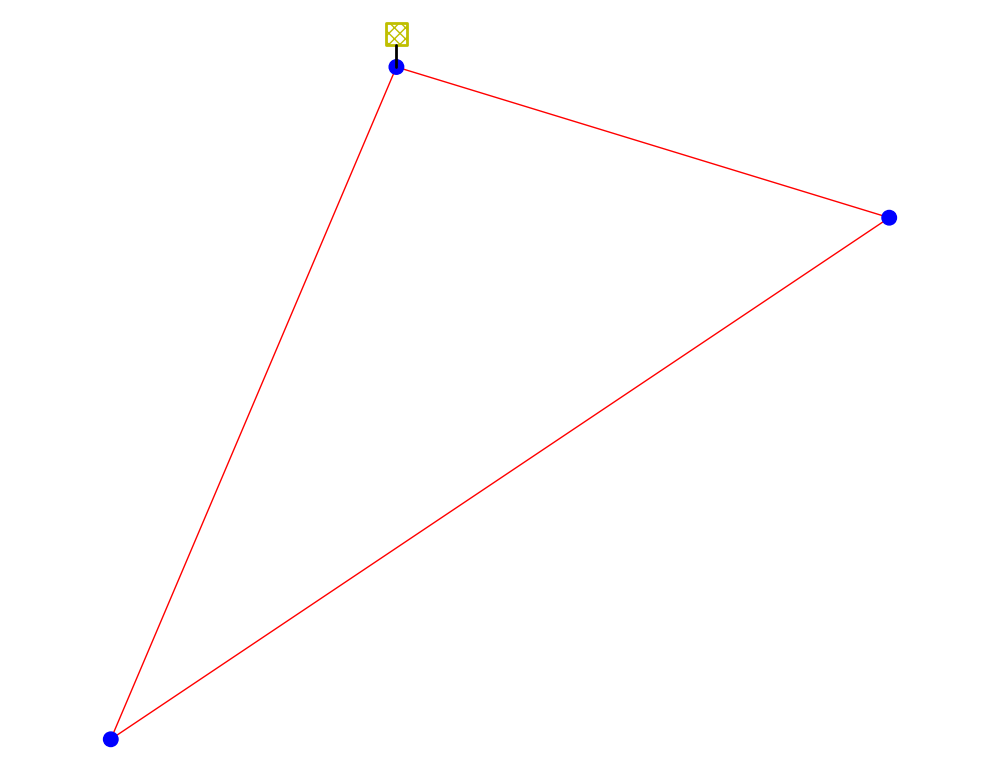

In [83]:
# use collections to plot a colourmap showing line loadings
simple_plot(net,line_color="r", bus_size=1.0)


#essayer un autre type de plot ??? 
cmap_list=[(20, "green"), (50, "yellow"), (60, "red")]
cmap, norm = cmap_continuous(cmap_list)

The supplied network uses an outdated geodata format. Please update your geodata by
running `pandapower.plotting.geo.convert_geodata_to_geojson(net)`


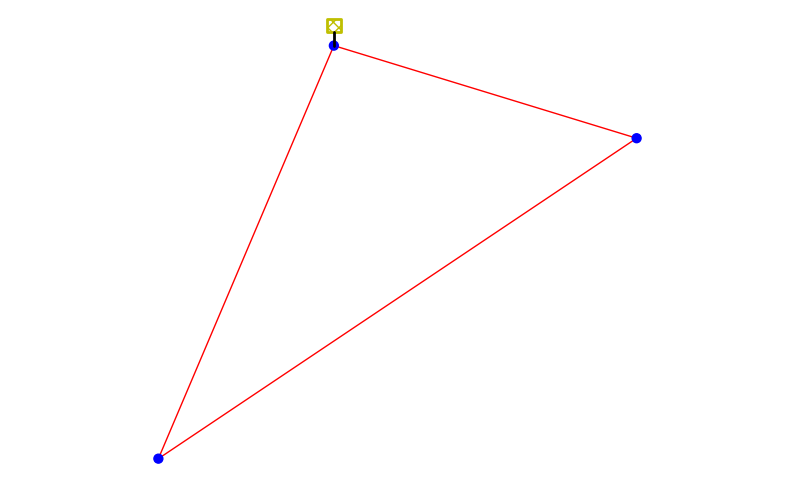

In [86]:
# plot the same figure on a matplotlib figure making use of the ax keyword within the draw_collections function.
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,6))

simple_plot(net, ax=ax, line_color="r", bus_size=1.0)
plt.show()

**9. Try adding a basemap to your plot. There are many ways in which you could do this, one library that makes this particularly helpful is contextily. Use the contextily.add_basemap function to add a basemap to your previous plot.**

Note: The coordinates within the network is gcs epsg:4326, e.g. lat long

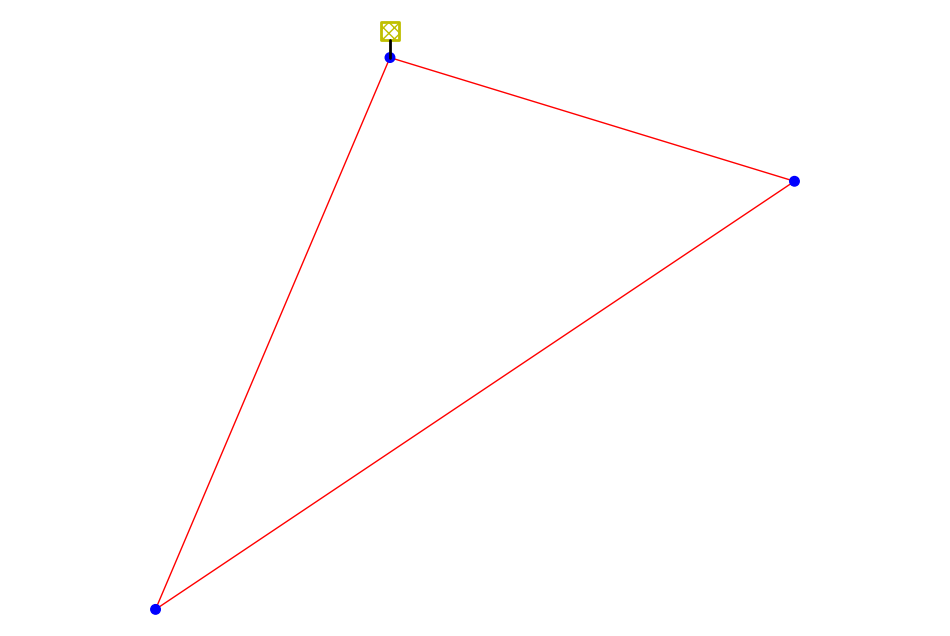

AttributeError: Stamen

In [95]:
import contextily as cx

import pandapower.plotting.geo as geo
# 1) convertir au nouveau format GeoJSON
geo.convert_geodata_to_geojson(net)

# 2) créer figure et axe
fig, ax = plt.subplots(figsize=(12,8))

# 3) tracer le réseau
simple_plot(net, ax=ax, line_color="r", bus_size=0.8)

# 4) convertir l’axe en projection EPSG:3857 pour contextily
# contextily transforme automatiquement si tu passes crs=3857
cx.add_basemap(ax, crs="EPSG:4326", source=cx.providers.Stamen.TerrainBackground)

# 5) afficher
plt.show()

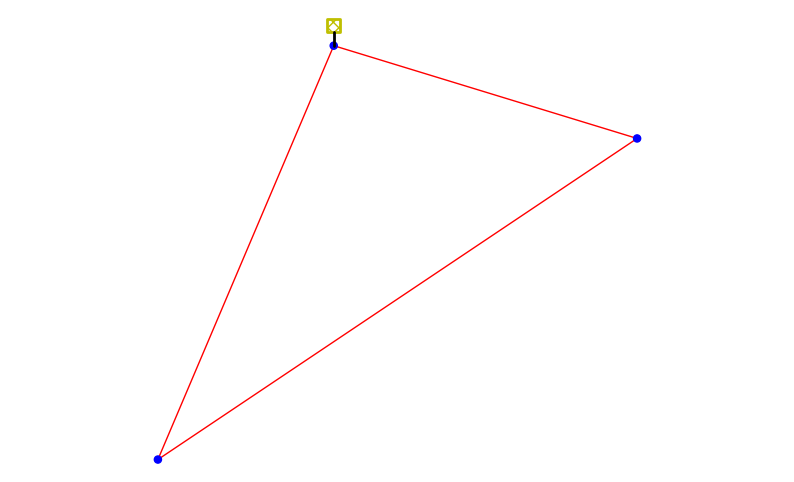

<Figure size 640x480 with 0 Axes>

In [96]:
# add a basemap to your plot
import contextily as cx

import pandapower.plotting.geo as geo
geo.convert_geodata_to_geojson(net)
#convertir les data en geopanda pour pouvoir tracer

fig, ax = plt.subplots(figsize=(10,6))

# tracer le réseau (passer ax)
simple_plot(net, ax=ax, line_color="r", bus_size=0.8)

# ajouter le basemap (le réseau doit être en EPSG:4326)
cx.add_basemap(ax, crs="EPSG:4326")

plt.show()

For more geospatial analysis options, you might want to convert your pandapower dataframes into a geopandas dataframe.

**10. Create a GeoDataFrame from the bus and bus_geodata dataframes. Your GDF should have a 'geometry' column containing Point objects and have a crs assigned.**

In [9]:
# create a GeoDataFrame


### Timeseries
So far, the power flow has been solved for a single timestamp. How might you go about solving for a timeseries of load and generation?

**11. Write some pseudo code for a general structure of how you could achieve it.**

PandaPower has some built in functions that simplify this for you. Take a look at the [timeseries tutorial](https://github.com/e2nIEE/pandapower/blob/develop/tutorials/time_series.ipynb) if you want more information.